Introduction:

Credit card fraud is a serious concern in the financial industry, resulting in significant financial losses and damaging customer trust. Early detection and prevention of fraudulent transactions are crucial to mitigate these risks. Machine learning techniques offer a powerful tool to tackle this problem.

In this project, I aim to develop an end-to-end machine learning model to predict credit card fraud using the UCI Credit Card dataset. By following a systematic approach, from data cleaning and analysis to model training and deployment, I demonstrate my skills in data science and machine learning. This project serves as a showcase of my abilities in building a functional machine learning pipeline, from data to deployment, to solve a real-world problem.

Problem Statement:

Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

Objective:

Objective: To develop an end-to-end machine learning model to predict credit card fraud using the UCI Credit Card dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("E:/Credit-Card-Default-Prediction-Project-Pwskills/notebooks/data/UCI_Credit_Card.csv")


In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

About the data Variables:

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars(includes individual and family/supplementary credit)
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight   months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT-New Taiwan dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


Pillars of Predictive Model Building:

1.Data Cleaning
2.EDA(Exploratory Data Analysis)
3.Data Preprocessing And Feature Engineering
4.Model Building
5.Model Evaluation
6.Model Improvement

1.Data Cleaning and EDA
* Let's have a look over Data:

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [11]:
df.shape

(30000, 25)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
#Check any anamolies or Null values in data
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [14]:
df=df.rename({"PAY_0":"PAY_1","default.payment.next.month":"default"},axis=1)

In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
#I want to know the probability to be default
def_probability=df["default"].value_counts(normalize=True)[1]
def_probability

0.2212

In [17]:
#Categorical Data

df[["SEX","EDUCATION","MARRIAGE"]].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [18]:
df["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

* No missing values but few anamolous things:
1. Education has 5 and 6 as unlabled data
2. Mariage has 3 undocumented.

In [19]:
#Payment Delay Description:
df[["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


They all too have an undocumented label -2, while -1 is termed as pay duly, 0 is also not there, One thing can be done is make all negative values to 0 with label pay duly.

In [20]:
#Let's see the bill amount:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


* Negative value can be iterpreted as credit

In [21]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [22]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

* The range is to Broad, Matter of Investigation.

Outlier Treatment

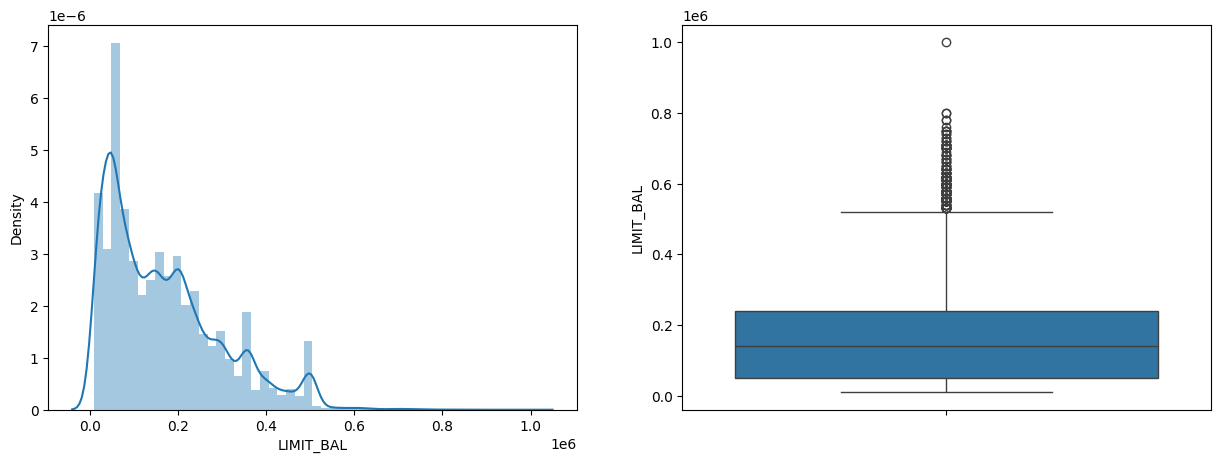

skewness -  0.992866960519544


In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(df['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(df['LIMIT_BAL'])

plt.show()

print('skewness - ',df['LIMIT_BAL'].skew())

* OBSERVATIONS:

1. Limit balance column is skewed to the left and skewness is near to 1.
2. In box plot we can see there are outliers to be handeled.
3. We will handel the outliers by using quantiles due to the skewed data.
4. As we apply quantiles we loss big number of data, So instant of removeing outliers I will cap them at upper_limit

In [24]:
percentile25=df['LIMIT_BAL'].quantile(0.25) # Calculating 25th Quantile
percentile75=df['LIMIT_BAL'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  50000.0 75th percentile -  240000.0
Upper Limit -  525000.0 Lower Limit -  -235000.0


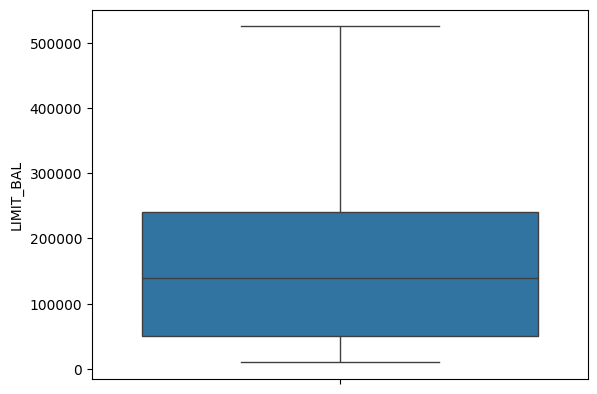

In [25]:
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL'] > upper_limit, upper_limit,
                 np.where(df['LIMIT_BAL'] < lower_limit, lower_limit,df['LIMIT_BAL']))
#Ploting box Plot After Outlier capping
sns.boxplot(df['LIMIT_BAL'])
plt.show()

AGE COLUMNS

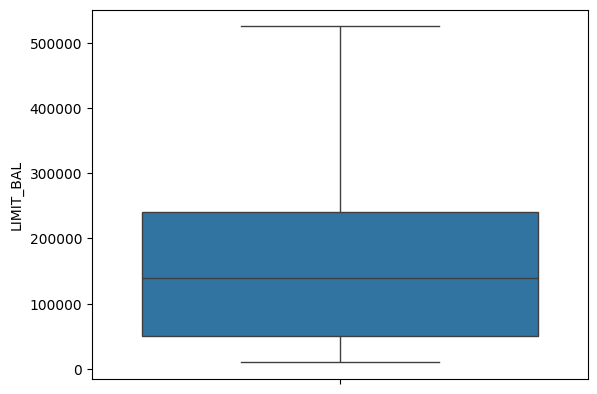

In [26]:
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL'] > upper_limit, upper_limit,
                 np.where(df['LIMIT_BAL'] < lower_limit, lower_limit,df['LIMIT_BAL']))
#Ploting box Plot After Outlier capping
sns.boxplot(df['LIMIT_BAL'])
plt.show()

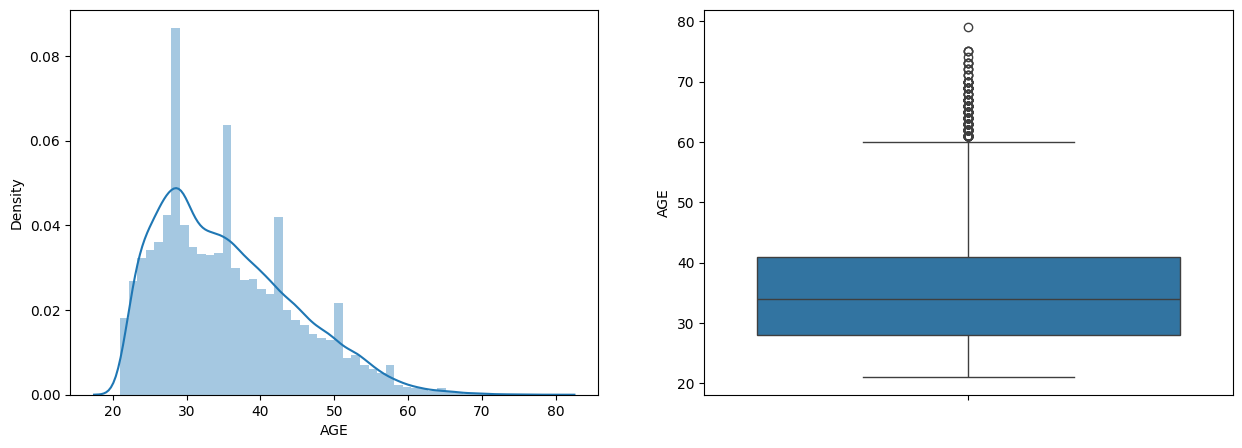

skewness -  0.7322458687830562


In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(df['AGE'])

plt.subplot(1,2,2)
sns.boxplot(df['AGE'])

plt.show()

print('skewness - ',df['AGE'].skew())

* OBSERVATIONS :

1. Age column is skewed to the left.
2. In box plot we can see there are outliers to be handeled.
3. We will handel the outliers by using quantiles due to the skewed data.
4. As we apply quantiles we loss big number of data, So instant of removeing outliers I will capp them at upper_limit

25th percentile -  28.0 75th percentile -  41.0
Upper Limit -  60.5 Lower Limit -  8.5


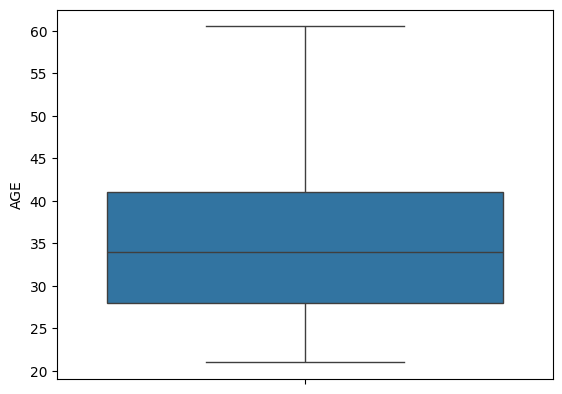

In [28]:
percentile25=df['AGE'].quantile(0.25) # Calculating 25th Quantile
percentile75=df['AGE'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

df['AGE'] = np.where(df['AGE'] > upper_limit, upper_limit,
                 np.where(df['AGE'] < lower_limit, lower_limit,df['AGE']))
#Ploting box Plot After Outlier capping
sns.boxplot(df['AGE'])
plt.show()

Visualizing on different aspects

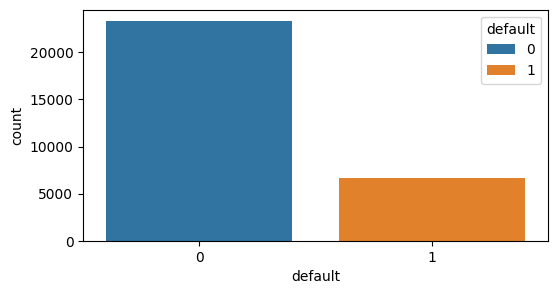

In [29]:
#Being Default-probability comparison
plt.figure(figsize=(6,3))
sns.countplot(x="default",data=df,hue=df["default"])
plt.show()

graph shows that both classes are not in proportion resulting in class imbalance

* Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others

In [30]:
df["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

* As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [31]:
filter=(df["EDUCATION"]==5) | (df["EDUCATION"]==6) | (df["EDUCATION"]==0)
df.loc[filter,"EDUCATION"]=4
df["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

* Marriage: 1 = married; 2 = single; 3 = others

In [32]:

df["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

* We have few values for 0, which are not determined . So I am adding them in Others category.

In [33]:
filter=(df["MARRIAGE"]==0)
df.loc[filter,"MARRIAGE"]=3
df["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [34]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default']
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 800x400 with 0 Axes>

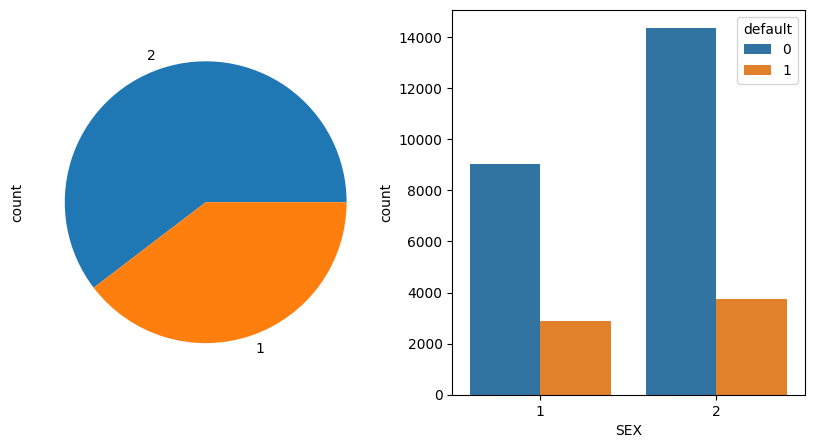

<Figure size 800x400 with 0 Axes>

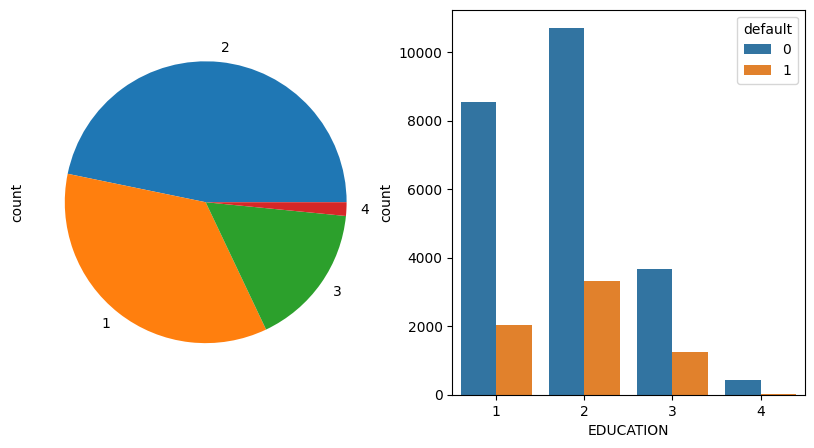

<Figure size 800x400 with 0 Axes>

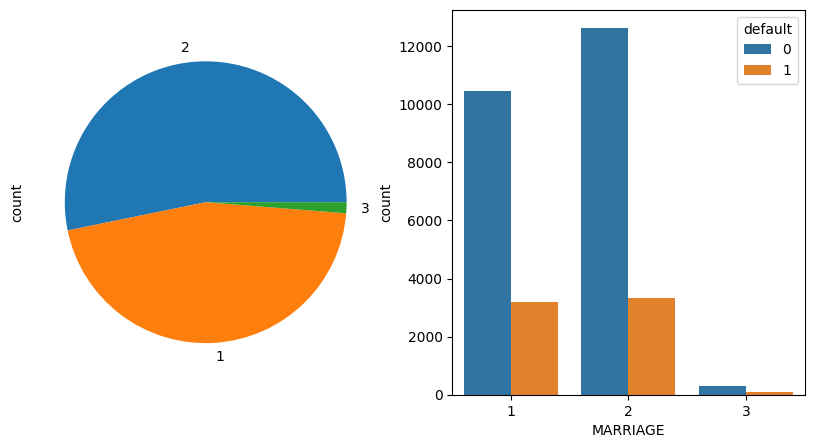

In [35]:
for col in categorical_features:
  plt.figure(figsize=(8,4))
  fig,axes=plt.subplots(ncols=2,figsize=(10,5))
  df[col].value_counts().plot(kind="pie",ax=axes[0],subplots=True)
  sns.countplot(x=col,hue="default",data=df)
plt.show()

These are few observation from above graphs:

1. There are more females credit card holder,so no. of defaulter have high proportion of females.
2. No. of defaulters have a higher proportion of educated people (graduate school and university)
3. No. of defaulters have a higher proportion of Singles.

<Axes: xlabel='default', ylabel='LIMIT_BAL'>

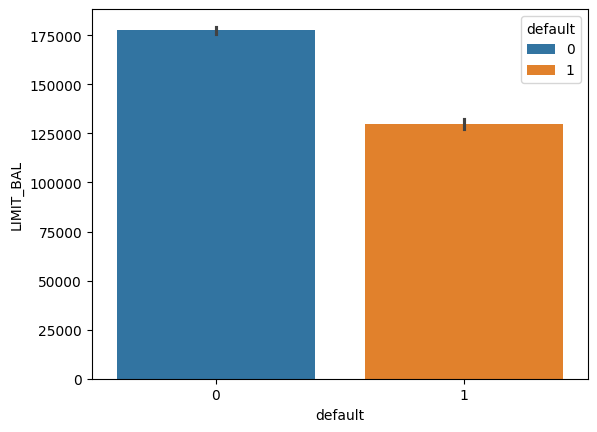

In [36]:
sns.barplot(x="default",y="LIMIT_BAL",data=df,hue="default")

<Axes: xlabel='default', ylabel='LIMIT_BAL'>

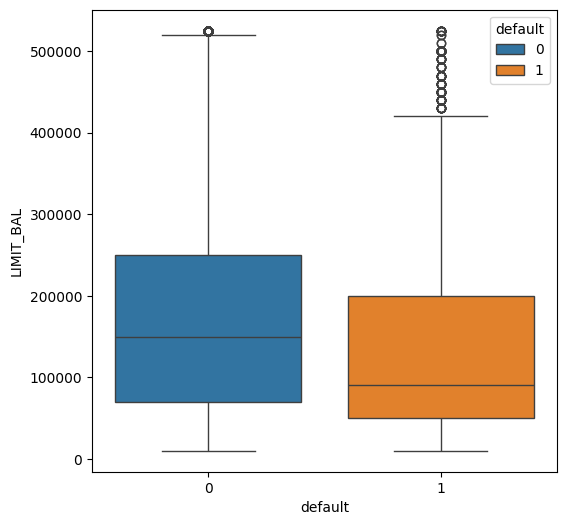

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(x="default",y="LIMIT_BAL",data=df,hue="default")

In [38]:
#Renaming the columns to be more informative:
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [39]:
filter=(df["PAY_SEPT"]==-1)|(df["PAY_SEPT"]==-2)|(df["PAY_SEPT"]==0)
df.loc[filter,"PAY_SEPT"]=0

* As Undocumented values -1,-2 are included in 0, meant same as Pay duly.

In [40]:
filter=(df["PAY_AUG"]==-1)|(df["PAY_AUG"]==-2)|(df["PAY_AUG"]==0)
df.loc[filter,"PAY_AUG"]=0
filter=(df["PAY_JUL"]==-1)|(df["PAY_JUL"]==-2)|(df["PAY_JUL"]==0)
df.loc[filter,"PAY_JUL"]=0
filter=(df["PAY_JUN"]==-1)|(df["PAY_JUN"]==-2)|(df["PAY_JUN"]==0)
df.loc[filter,"PAY_JUN"]=0
filter=(df["PAY_MAY"]==-1)|(df["PAY_MAY"]==-2)|(df["PAY_MAY"]==0)
df.loc[filter,"PAY_MAY"]=0
filter=(df["PAY_APR"]==-1)|(df["PAY_APR"]==-2)|(df["PAY_APR"]==0)
df.loc[filter,"PAY_APR"]=0

* Age: Plotting graph of number of ages of all users with credit card irrespective of gender

In [41]:
df["AGE"].value_counts()

AGE
29.0    1605
27.0    1477
28.0    1409
30.0    1395
26.0    1256
31.0    1217
25.0    1186
34.0    1162
32.0    1158
33.0    1146
24.0    1127
35.0    1113
36.0    1108
37.0    1041
39.0     954
38.0     944
23.0     931
40.0     870
41.0     824
42.0     794
44.0     700
43.0     670
45.0     617
46.0     570
22.0     560
47.0     501
48.0     466
49.0     452
50.0     411
51.0     340
53.0     325
52.0     304
60.5     272
54.0     247
55.0     209
56.0     178
58.0     122
57.0     122
59.0      83
60.0      67
21.0      67
Name: count, dtype: int64

In [42]:
df["AGE"]=df["AGE"].astype("int")

<Axes: xlabel='None', ylabel='AGE'>

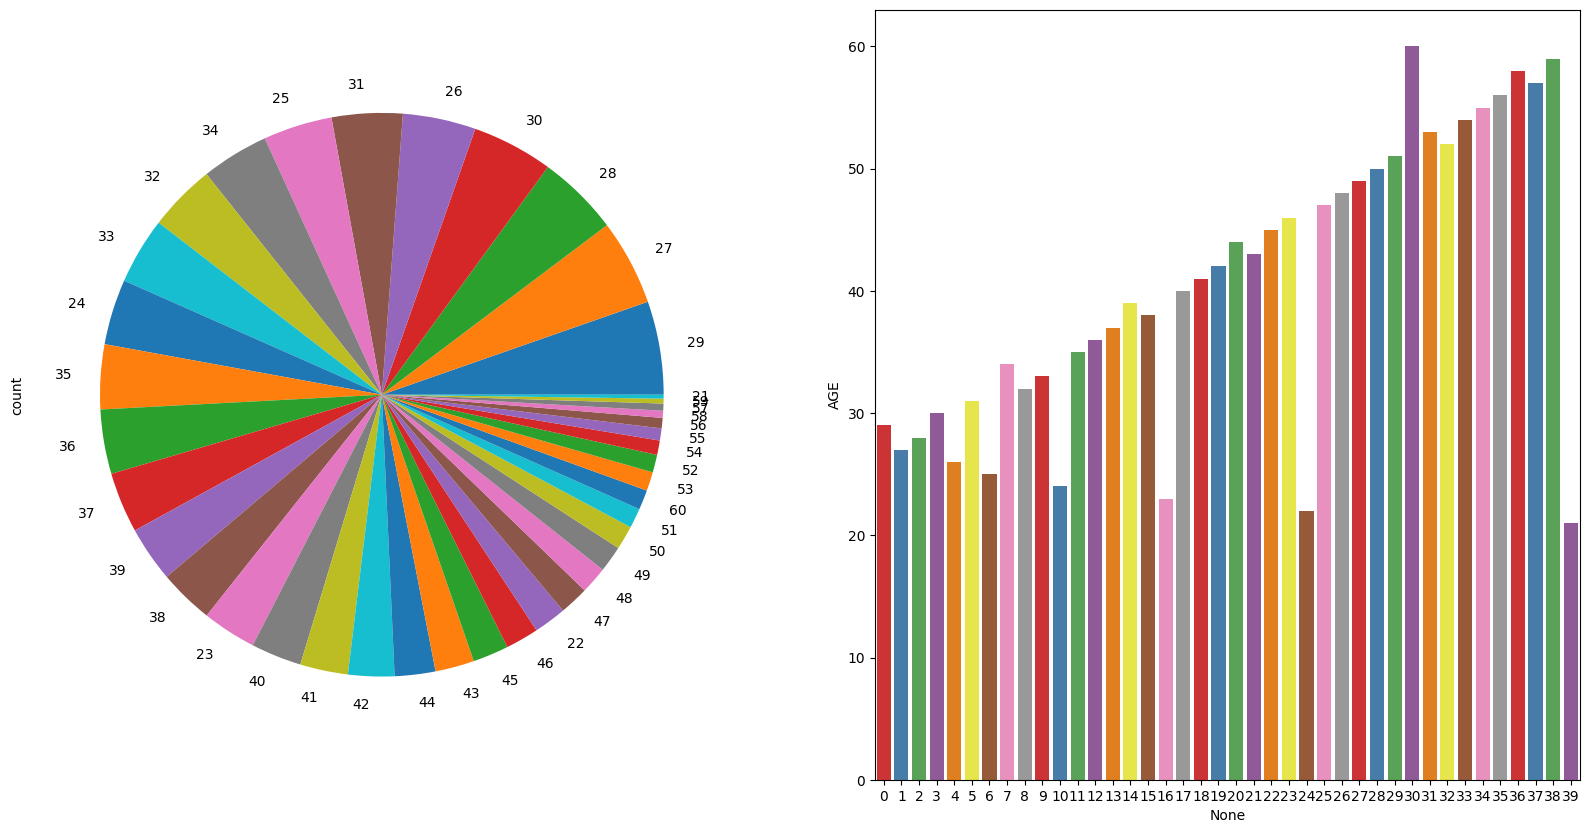

In [43]:
fig,axes=plt.subplots(ncols=2,figsize=(20,10))
df_d=df["AGE"].value_counts().reset_index()
df["AGE"].value_counts().plot(kind="pie",ax=axes[0],subplots=True)
sns.barplot(x=df_d.index,y="AGE",data=df_d,ax=axes[1],orient="v", palette="Set1")

In [44]:
df.groupby("default")["AGE"].mean()

default
0    35.378788
1    35.677818
Name: AGE, dtype: float64

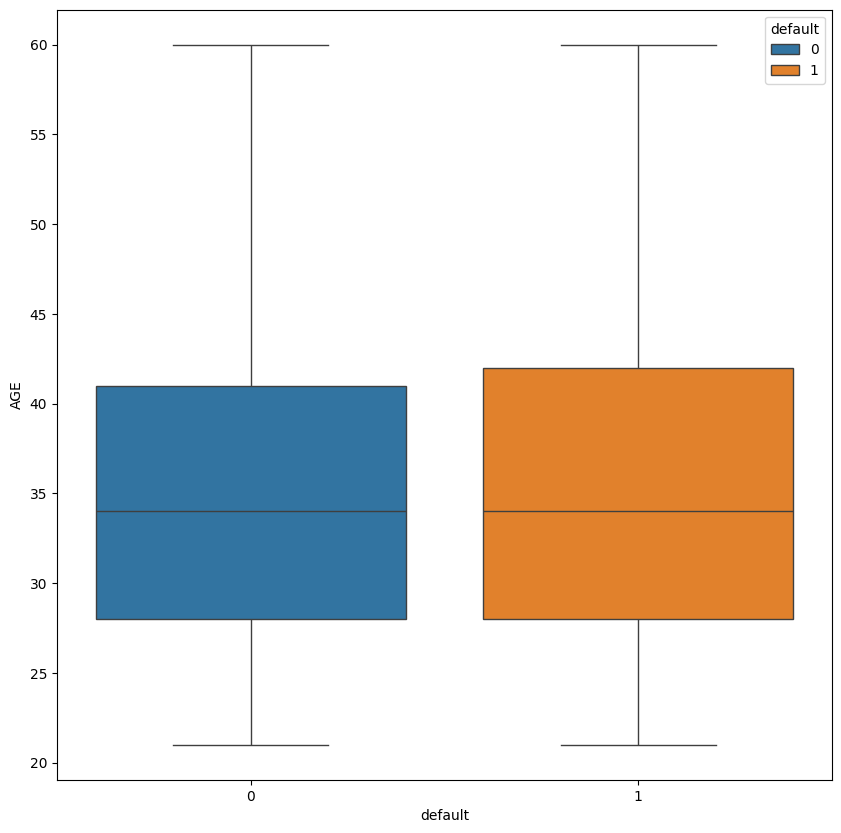

In [45]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default", y="AGE", data=df,hue="default")

* Bill Amount


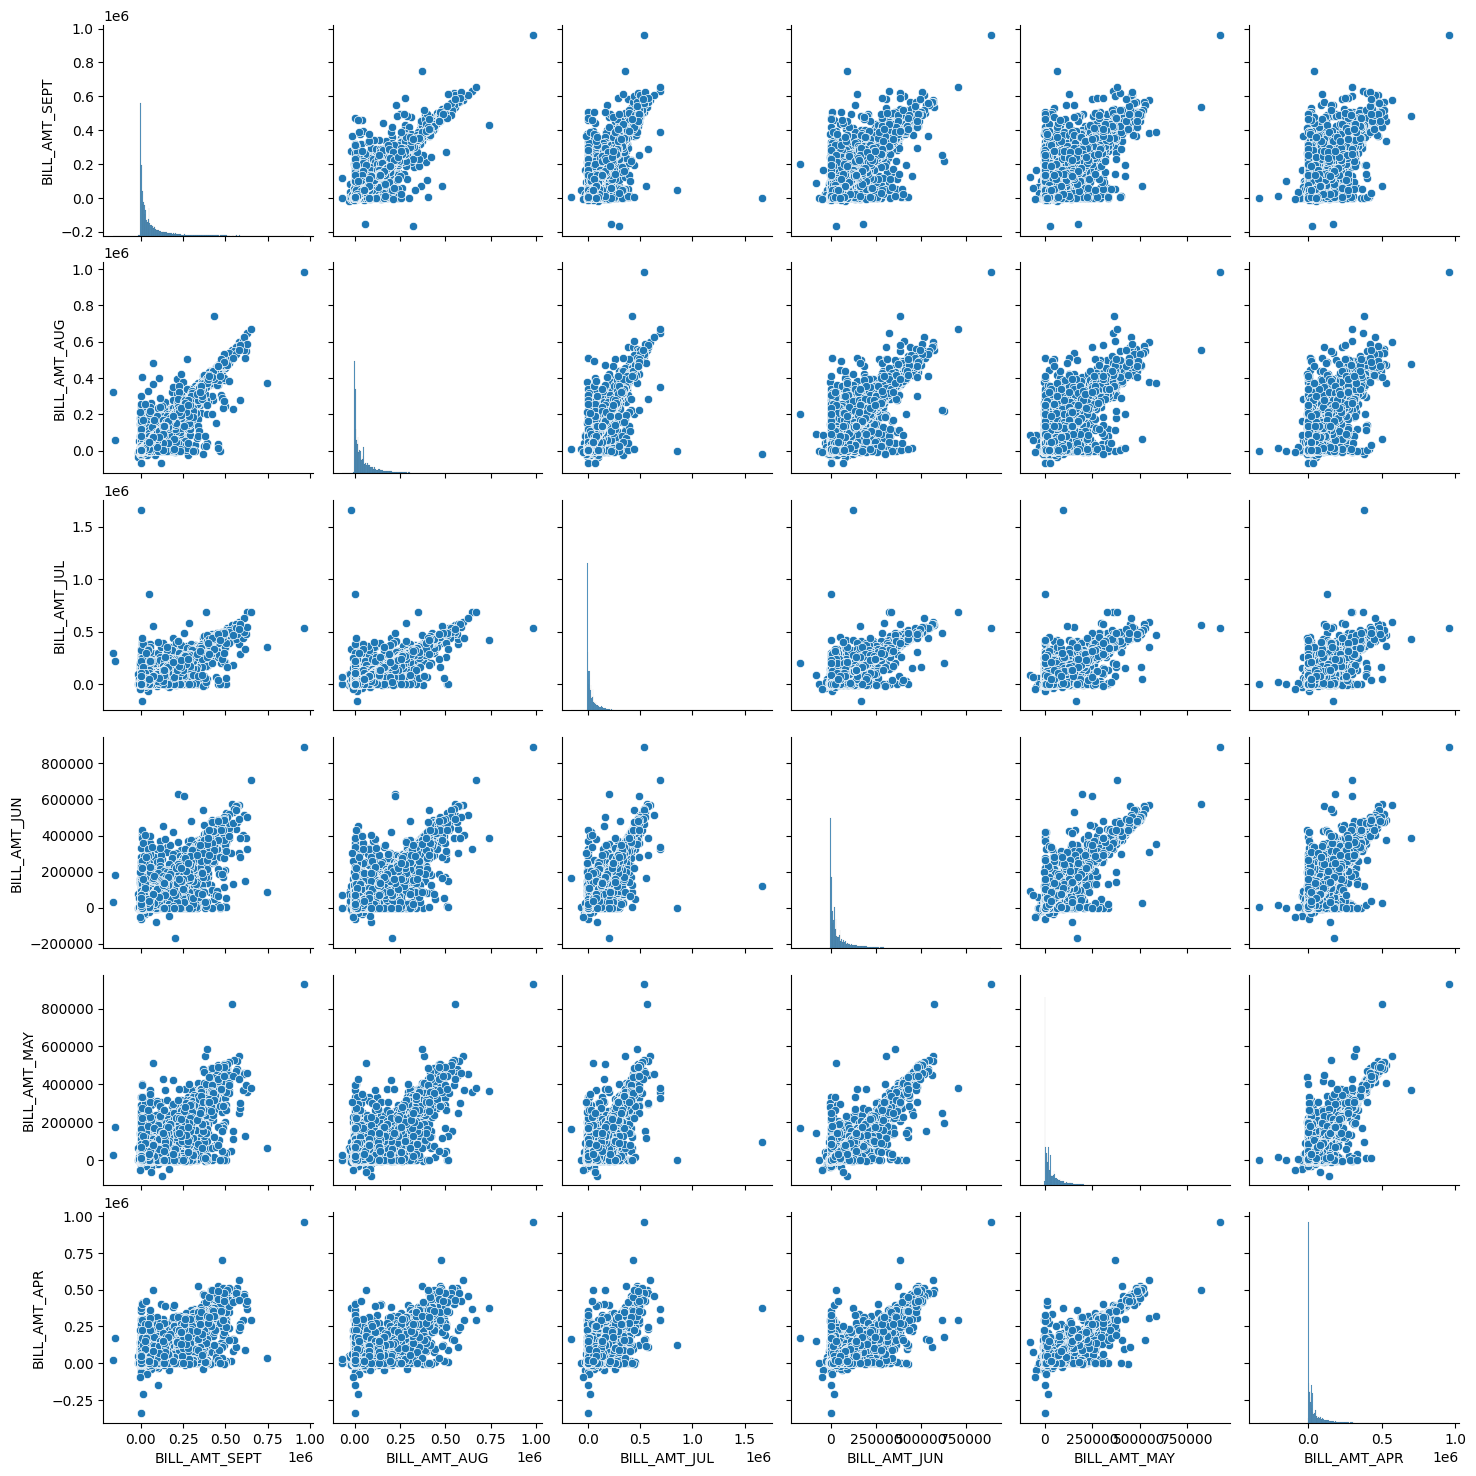

In [46]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]
sns.pairplot(data = bill_amnt_df)

* History Payment status

In [47]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


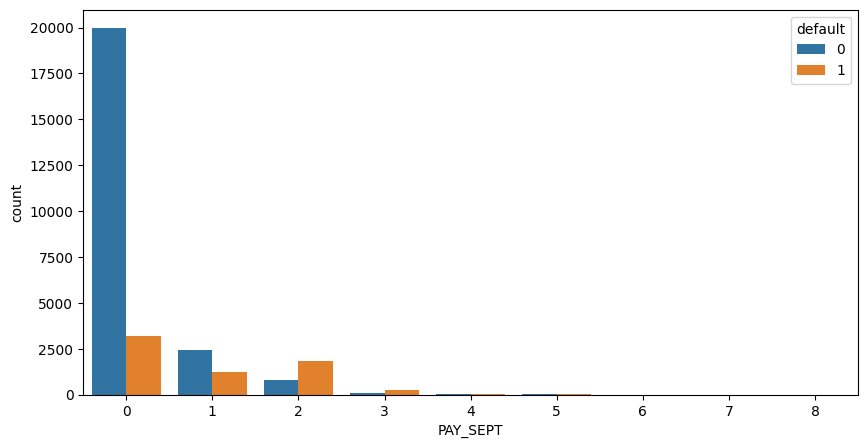

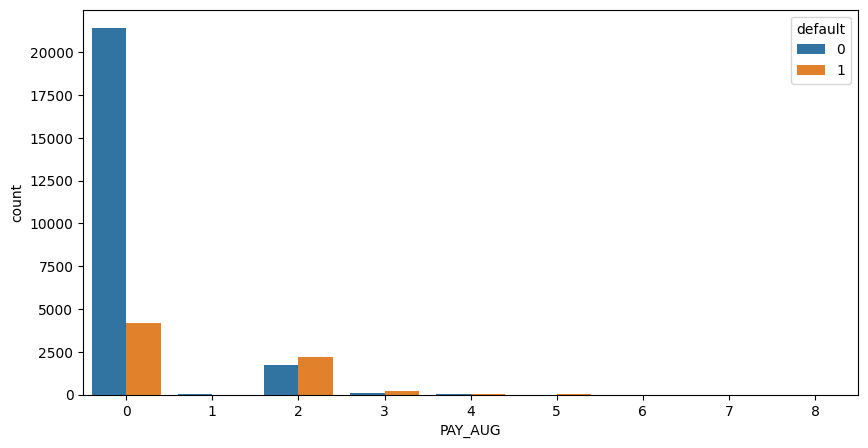

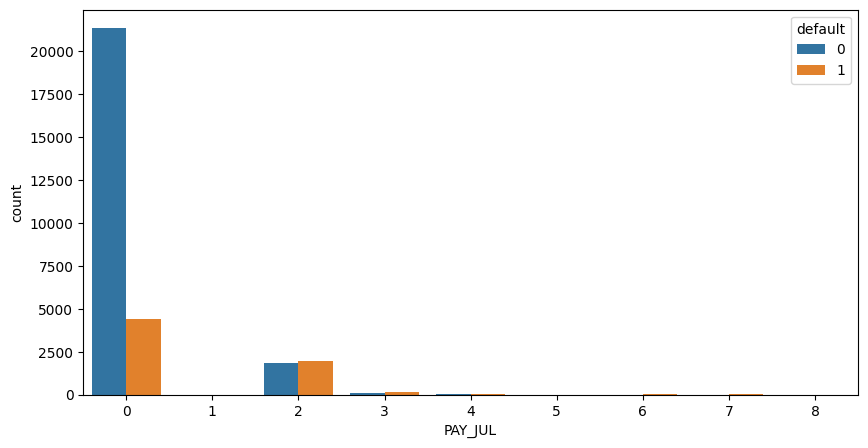

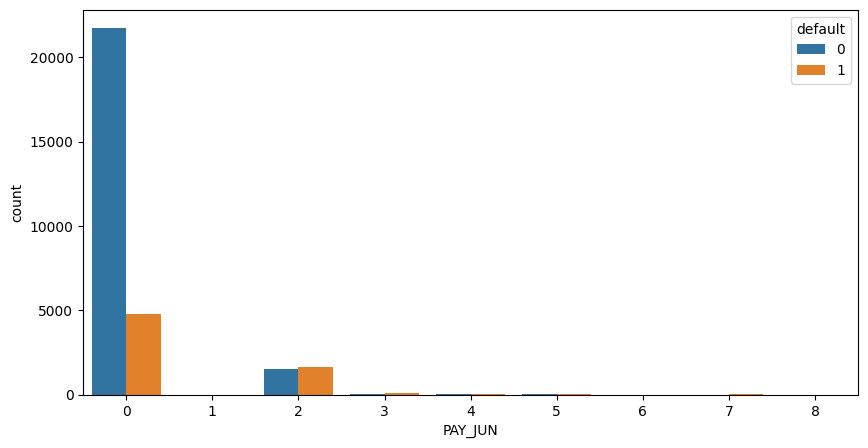

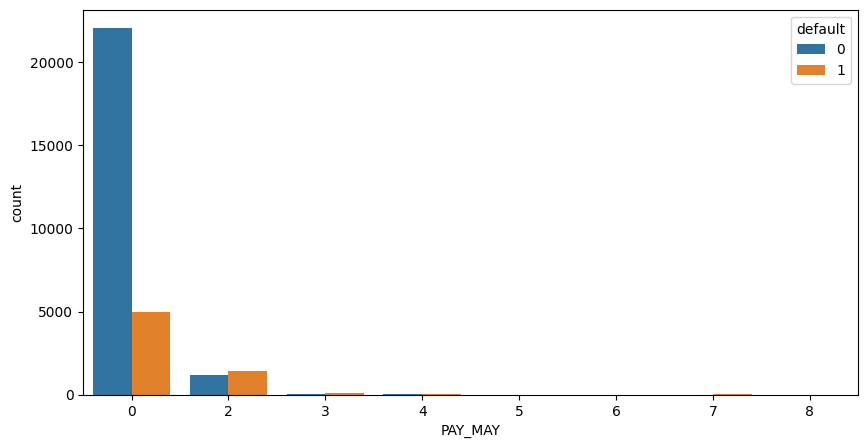

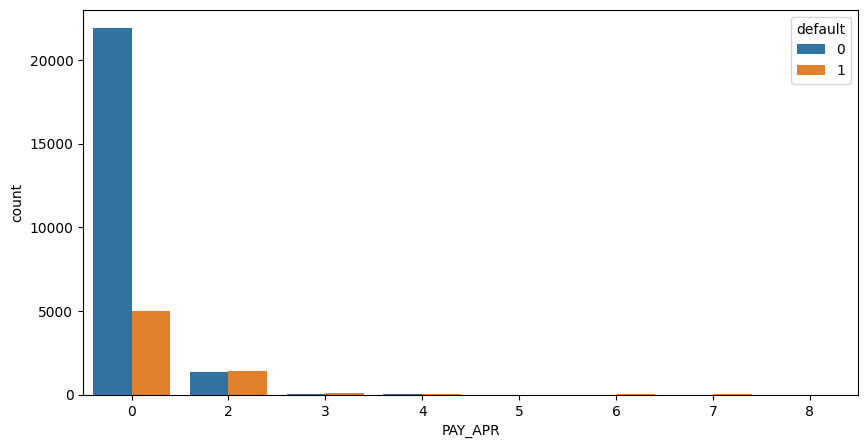

In [48]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default', data = df)

* Paid Amount

In [49]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default']]

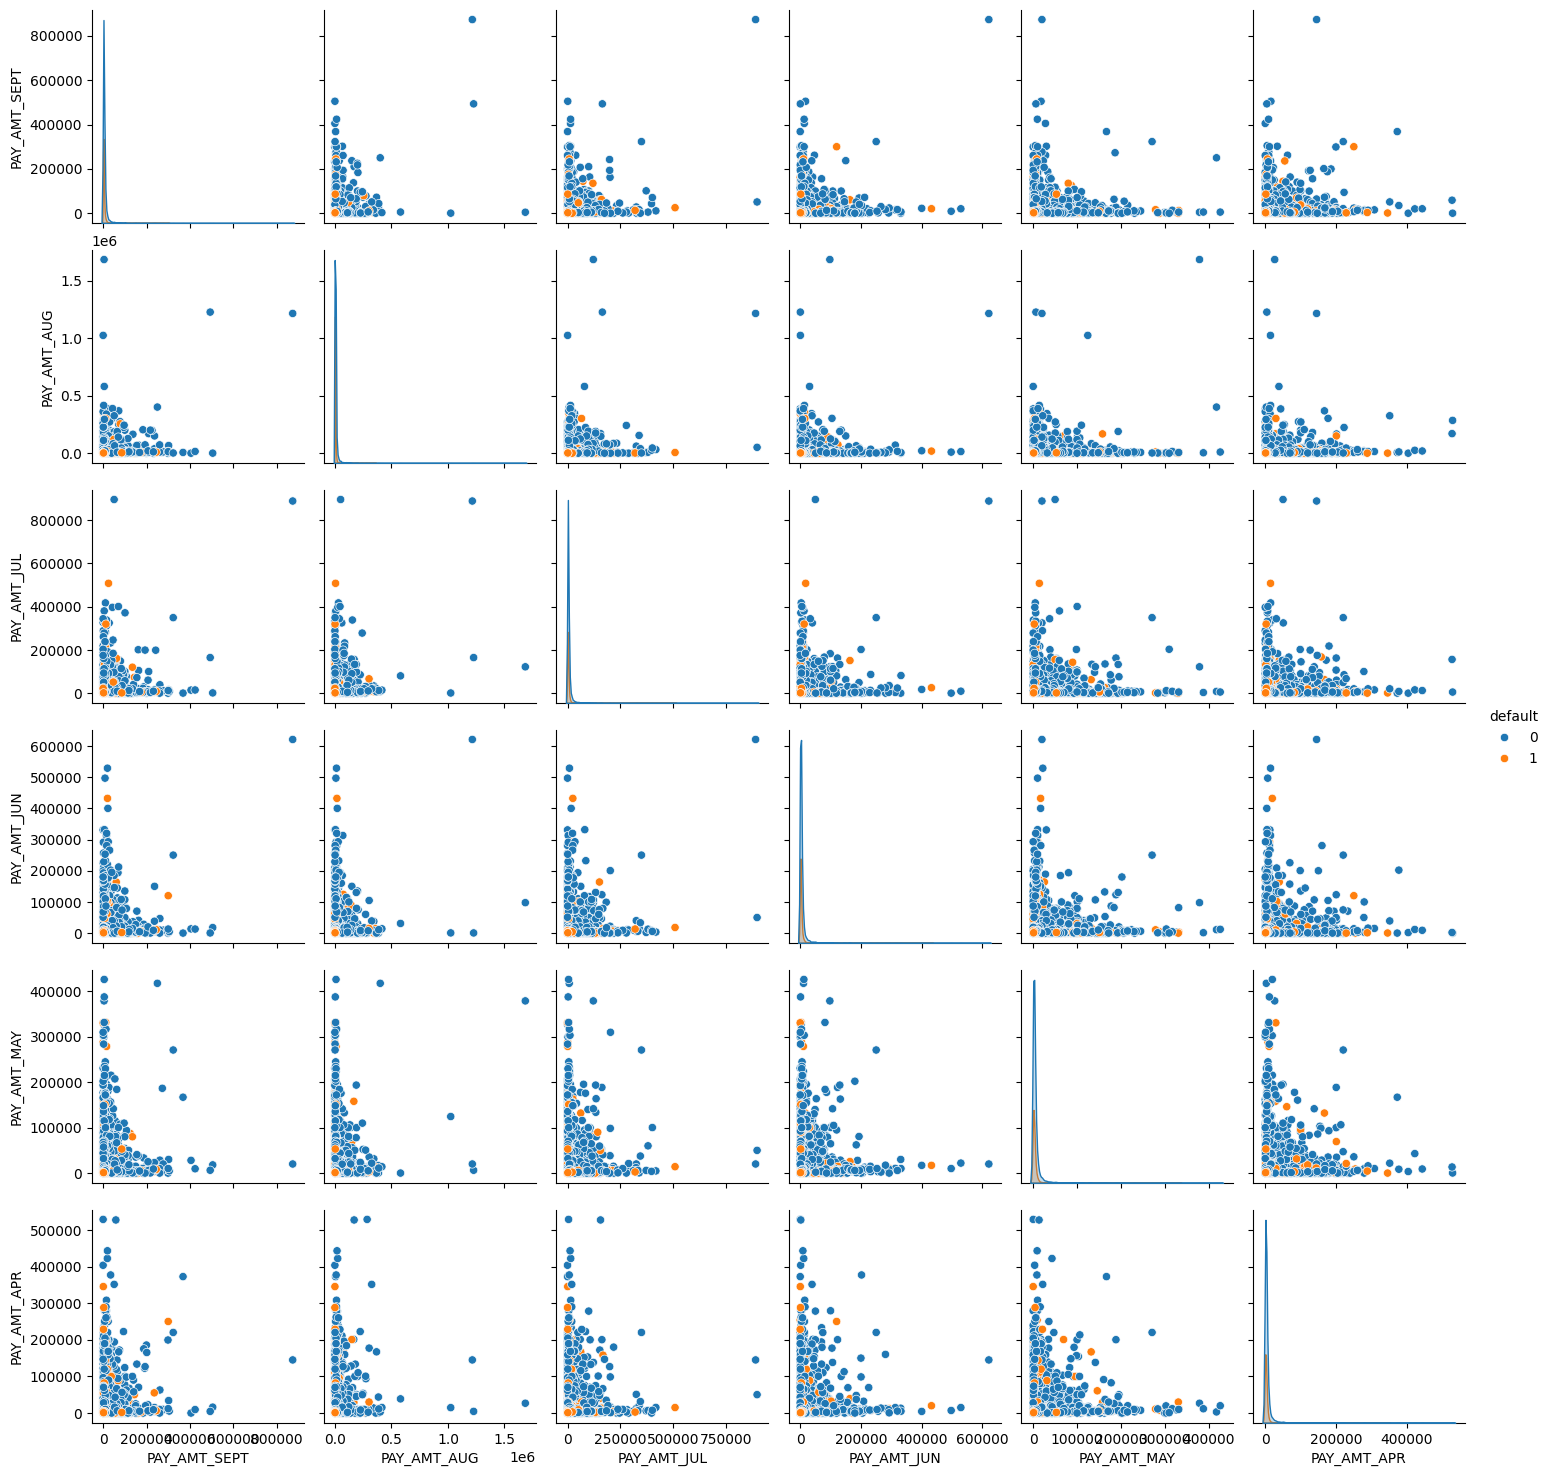

In [50]:
sns.pairplot(data=pay_amnt_df,hue="default")

In [51]:
df.shape

(30000, 25)

* Data Preprocessing and Feature Engineering

As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

In [53]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(df.iloc[:,0:-1],df["default"])
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [54]:
columns=list(df.columns)

In [55]:
columns.pop()


'default'

In [56]:
balanced_df=pd.DataFrame(x_smote,columns=columns)

In [57]:
balanced_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000.000000,2,2,1,24,2,2,0,0,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,0,2,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,0,0,0,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,14291,160000.000000,2,1,1,46,0,0,0,0,...,30.817708,61.635416,30.817708,44.997635,30.817708,30.817708,61.635416,0.000000,44.997635,30.817708
46724,29860,210000.000000,1,1,1,33,0,0,0,0,...,337.327122,337.327122,610.575098,337.327122,337.327122,337.327122,337.327122,610.575098,64.079145,337.327122
46725,24392,10000.000000,1,1,1,37,0,0,1,0,...,7825.261850,8650.423117,9545.655181,9776.797527,1453.362047,43.248929,1106.218394,996.890803,488.329648,15.545984
46726,1175,42474.643049,1,2,1,42,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,1288.973707,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
balanced_df["default"]=y_smote

In [59]:
balanced_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000.000000,2,2,1,24,2,2,0,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.000000,2,2,2,26,0,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.000000,2,2,2,34,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,4,50000.000000,2,2,1,37,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,5,50000.000000,1,2,1,57,0,0,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,14291,160000.000000,2,1,1,46,0,0,0,0,...,61.635416,30.817708,44.997635,30.817708,30.817708,61.635416,0.000000,44.997635,30.817708,1
46724,29860,210000.000000,1,1,1,33,0,0,0,0,...,337.327122,610.575098,337.327122,337.327122,337.327122,337.327122,610.575098,64.079145,337.327122,1
46725,24392,10000.000000,1,1,1,37,0,0,1,0,...,8650.423117,9545.655181,9776.797527,1453.362047,43.248929,1106.218394,996.890803,488.329648,15.545984,1
46726,1175,42474.643049,1,2,1,42,0,0,0,0,...,0.000000,0.000000,0.000000,1288.973707,0.000000,0.000000,0.000000,0.000000,0.000000,1


<Axes: xlabel='default', ylabel='count'>

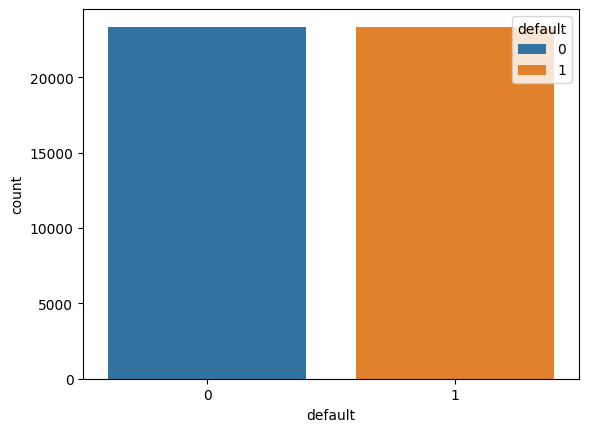

In [60]:

sns.countplot(x="default",data=balanced_df,hue=balanced_df["default"])

In [61]:
df["PAY_SEPT"].value_counts()

PAY_SEPT
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64

In [62]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [63]:
model_df=df.copy()

In [64]:
model_df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


4. Model Building and Evaluation

In [65]:
model_df["DEFAULTER"]=model_df["default"]
model_df=model_df.drop("default", axis=1)
model_df=model_df.drop("ID", axis=1)
model_df.sample(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULTER
10562,190000.0,1,2,1,36,0,0,0,0,0,...,80874.0,81720.0,87685.0,7007.0,2912.0,2871.0,3501.0,8001.0,3234.0,0


In [66]:
x=model_df.drop("DEFAULTER",axis=1)
y=model_df["DEFAULTER"]

In [67]:
x.shape,y.shape

((30000, 23), (30000,))

In [68]:
#Feature_Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gbtc=GradientBoostingClassifier(n_estimators=50,random_state=2)
gbtc.fit(x_train,y_train)
y_pred1=gbtc.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8201111111111111
[[6686  314]
 [1305  695]]
0.688800792864222


In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7692222222222223
[[5827 1173]
 [ 904 1096]]
0.4830321727633319


In [74]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7985555555555556
[[6837  163]
 [1650  350]]
0.682261208576998


In [75]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7824444444444445
[[6121  879]
 [1079  921]]
0.5116666666666667


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [77]:
svc=SVC(kernel="sigmoid", gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear", penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb=XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs={
    "SVC":svc,
    "KN":knc,
    "NB":bnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
}

In [79]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [80]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.682, 0.2769151138716356)

In [81]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("for ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for  SVC
Accuracy -  0.682
Precision -  0.2769151138716356
for  KN
Accuracy -  0.7916666666666666
Precision -  0.5516956162117452
for  NB
Accuracy -  0.7824444444444445
Precision -  0.5116666666666667
for  DT
Accuracy -  0.8184444444444444
Precision -  0.6826347305389222
for  LR
Accuracy -  0.8148888888888889
Precision -  0.6799568965517241
for  RF
Accuracy -  0.8115555555555556
Precision -  0.6420560747663552
for  AdaBoost
Accuracy -  0.8134444444444444
Precision -  0.6738894907908992
for  BgC
Accuracy -  0.8107777777777778
Precision -  0.633423180592992
for  ETC
Accuracy -  0.8102222222222222
Precision -  0.6265164644714039
for  GBDT
Accuracy -  0.8201111111111111
Precision -  0.688800792864222


In [83]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores}).sort_values("Precision",ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
9,GBDT,0.820111,0.688801
3,DT,0.818444,0.682635
4,LR,0.814889,0.679957
6,AdaBoost,0.813444,0.673889
5,RF,0.811556,0.642056
7,BgC,0.810778,0.633423
8,ETC,0.810222,0.626516
1,KN,0.791667,0.551696
2,NB,0.782444,0.511667
0,SVC,0.682000,0.276915


In [85]:
performance_df1=pd.melt(performance_df, id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,GBDT,Accuracy,0.820111
1,DT,Accuracy,0.818444
2,LR,Accuracy,0.814889
3,AdaBoost,Accuracy,0.813444
4,RF,Accuracy,0.811556
5,BgC,Accuracy,0.810778
6,ETC,Accuracy,0.810222
7,KN,Accuracy,0.791667
8,NB,Accuracy,0.782444
9,SVC,Accuracy,0.682000


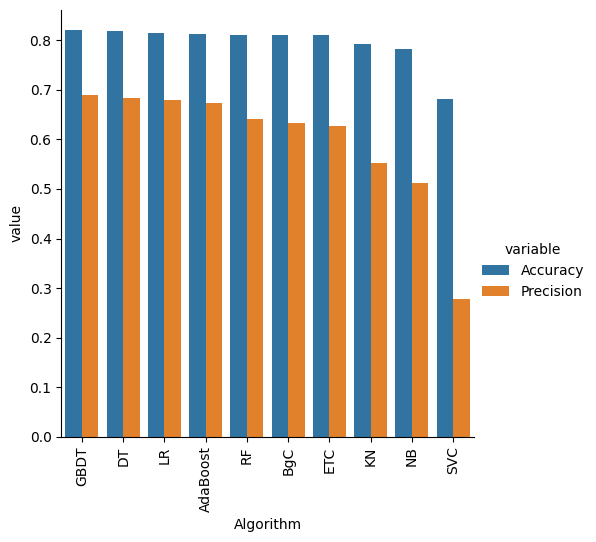

In [86]:
sns.catplot(x="Algorithm", y="value",hue="variable", data=performance_df1,kind="bar")
plt.ylim()
plt.xticks(rotation="vertical")
plt.show()

In [87]:
#Voting Classifier
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear", penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb=XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('dtc', dtc), ('lrc', lrc), ('rfc', rfc),("abc",abc),("gbdt",gbdt)],voting='soft')

In [88]:
voting=voting.fit(x_train,y_train)

In [89]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8195555555555556
Precision 0.687624750499002


So, conclusively, We'll have to choose Gradient boost(GBTC) with highest accuracy and precision.

Model Improvement: Hyperparameter Tuning

In [90]:
#Gradient Boost
from sklearn.model_selection import GridSearchCV
gdc=GradientBoostingClassifier()
param_grid={"n_estimators":[50,100],
          "learning_rate":[0.001,0.1,1],
         "ccp_alpha":[1,2]}
clf=GridSearchCV(estimator=gdc,param_grid=param_grid,cv=5,verbose=3)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.779 total time=  10.1s
[CV 2/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.779 total time=   8.7s
[CV 3/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.779 total time=   8.4s
[CV 4/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.779 total time=   8.7s
[CV 5/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.779 total time=   8.5s
[CV 1/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.779 total time=  17.0s
[CV 2/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.779 total time=  20.6s
[CV 3/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.779 total time=  19.7s
[CV 4/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.779 total time=  21.4s
[CV 5/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [1, 2], 'learning_rate': [0.001, 0.1, 1],
                         'n_estimators': [50, 100]},
             verbose=3)

In [92]:
clf.best_score_

0.7792380952380953

In [93]:
best_model=clf.best_estimator_
y_pred=best_model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.7777777777777778
Precision 0.0
